In [ ]:
import torch
#import torch.nm as nn
import matplotlib.pyplot as plt
import numpy as np


/tmp/ipython-input-4037260946.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4421.)
  y = x @ true_weights.T +true_bias


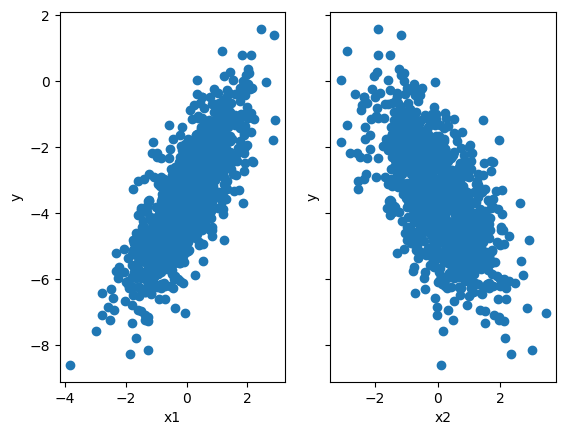

In [ ]:
torch.manual_seed(42)
num_samples = 1000
x = torch.randn(num_samples, 2)

true_weights = torch.tensor([1.3, -1])
true_bias =  torch.tensor([-3.5])

y = x @ true_weights.T +true_bias

fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].scatter(x[:,0],y)
ax[1].scatter(x[:,1],y)

ax[0].set_xlabel('x1')
ax[1].set_xlabel('x2')
ax[0].set_ylabel('y')
ax[1].set_ylabel('y')
plt.show()


Prompting user to upload an image file...


Saving grayscale.png to grayscale (5).png
 Loaded: grayscale (5).png (1194334 bytes)
 Original image shape: (1536, 1024, 3), dtype: uint8, ndim: 3
 Converting BGR -> Grayscale
 Grayscale image shape: (1536, 1024), dtype: uint8
 Pixel stats - min: 16, max: 255, mean: 128.14, std: 62.95
 Created Gaussian kernel of shape: (15, 15), sum: 1.0000
 Applying custom Gaussian filter...
Custom filtered image stats - min: 18, max: 255, mean: 128.14
Applying cv2.GaussianBlur...
 Built-in GaussianBlur stats - min: 16, max: 255, mean: 128.14
Displaying original and filtered images...


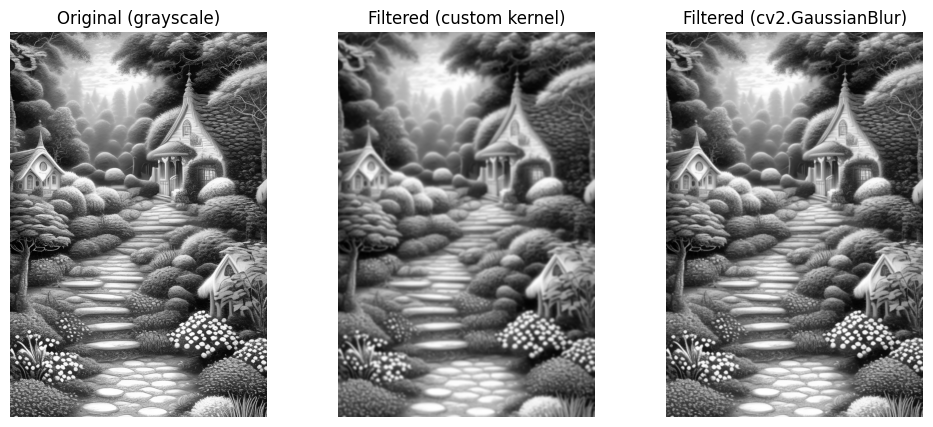

[DEBUG] Display complete.


In [ ]:
from google.colab import files
import cv2
import numpy as np
from matplotlib import pyplot as plt

print("Prompting user to upload an image file...")
uploaded = files.upload()

if not uploaded:
    raise SystemExit(" No file uploaded. Rerun the cell and choose a file.")

filename = next(iter(uploaded.keys()))
print(f" Loaded: {filename} ({len(uploaded[filename])} bytes)")

file_bytes = np.asarray(bytearray(uploaded[filename]), dtype=np.uint8)
img = cv2.imdecode(file_bytes, cv2.IMREAD_UNCHANGED)
if img is None:
    raise ValueError("Could not decode the uploaded image.")

print(f" Original image shape: {img.shape}, dtype: {img.dtype}, ndim: {img.ndim}")

if img.ndim == 3 and img.shape[2] == 4:
    print("Image has alpha channel; converting BGRA -> BGR")
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

if img.ndim == 3:  # BGR -> Gray
    print(" Converting BGR -> Grayscale")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    print("Image is already single channel")
    gray = img.copy()

print(f" Grayscale image shape: {gray.shape}, dtype: {gray.dtype}")
print(f" Pixel stats - min: {np.min(gray)}, max: {np.max(gray)}, mean: {np.mean(gray):.2f}, std: {np.std(gray):.2f}")

def gaussian_kernel(size, size_y=None):
    size = int(size)
    if size_y is None:
        size_y = size
    else:
        size_y = int(size_y)
    sigma_x = size / 2.0
    sigma_y = size_y / 2.0
    x, y = np.mgrid[-size:size+1, -size_y:size_y+1]
    g = np.exp(-(x**2/(2*sigma_x**2) + y**2/(2*sigma_y**2)))
    g = g / g.sum()
    print(f" Created Gaussian kernel of shape: {g.shape}, sum: {g.sum():.4f}")
    return g.astype(np.float32)

kernel_size = 7
kernel = gaussian_kernel(kernel_size)

print(" Applying custom Gaussian filter...")
filtered_custom = cv2.filter2D(gray, -1, kernel)
print(f"Custom filtered image stats - min: {np.min(filtered_custom)}, max: {np.max(filtered_custom)}, mean: {np.mean(filtered_custom):.2f}")

print("Applying cv2.GaussianBlur...")
filtered_builtin = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
print(f" Built-in GaussianBlur stats - min: {np.min(filtered_builtin)}, max: {np.max(filtered_builtin)}, mean: {np.mean(filtered_builtin):.2f}")

print("Displaying original and filtered images...")
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Original (grayscale)")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Filtered (custom kernel)")
plt.imshow(filtered_custom, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Filtered (cv2.GaussianBlur)")
plt.imshow(filtered_builtin, cmap='gray')
plt.axis('off')

plt.show()
print("[DEBUG] Display complete.")


Please upload a PNG image file:


Saving grayscale.png to grayscale (6).png
 Uploaded file: grayscale (6).png
Grayscale image shape: (1536, 1024), dtype: uint8
Using kernel size: 3
Starting mean filter...
 Window at (y=0, x=0):
[[ 0  0  0]
 [ 0 72 46]
 [ 0 39 36]]
 Mean value: 21.444444444444443
 Window at (y=0, x=1):
[[ 0  0  0]
 [72 46 49]
 [39 36 35]]
 Mean value: 30.77777777777778
 Window at (y=1, x=0):
[[ 0 72 46]
 [ 0 39 36]
 [ 0 32 34]]
 Mean value: 28.77777777777778
 Window at (y=1, x=1):
[[72 46 49]
 [39 36 35]
 [32 34 40]]
 Mean value: 42.55555555555556
 Finished mean filtering.


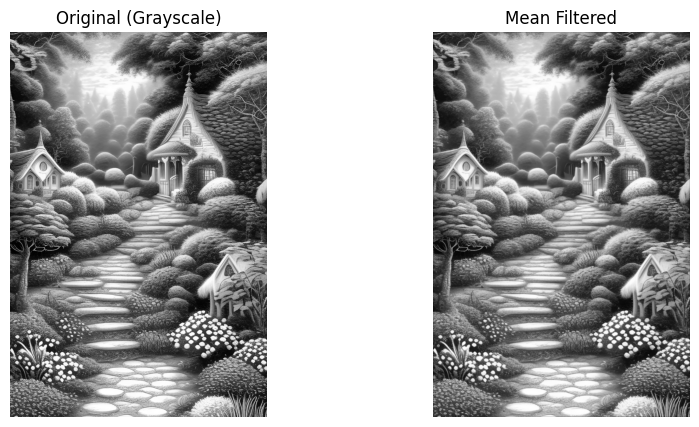

In [ ]:

from google.colab import files
import cv2
import numpy as np

print("Please upload a PNG image file:")
uploaded = files.upload()

if not uploaded:
    raise SystemExit("No file uploaded. Rerun the cell and choose a file.")

filename = next(iter(uploaded.keys()))
print(f" Uploaded file: {filename}")

file_bytes = np.asarray(bytearray(uploaded[filename]), dtype=np.uint8)
image = cv2.imdecode(file_bytes, cv2.IMREAD_UNCHANGED)

if image is None:
    raise ValueError("Could not decode uploaded image.")

if image.ndim == 3 and image.shape[2] == 4:
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

if image.ndim == 3:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image.copy()

print(f"Grayscale image shape: {gray.shape}, dtype: {gray.dtype}")

def mean_filter(image, kernel_size):
    print("Starting mean filter...")
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(
        image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT
    )
    filtered_image = np.zeros_like(image)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            window = padded_image[y:y+kernel_size, x:x+kernel_size]
            mean_value = np.mean(window)

            if y < 2 and x < 2:
                print(f" Window at (y={y}, x={x}):\n{window}")
                print(f" Mean value: {mean_value}")

            filtered_image[y, x] = mean_value

    print(" Finished mean filtering.")
    return filtered_image

kernel_size = 3
print(f"Using kernel size: {kernel_size}")
filtered_image = mean_filter(gray, kernel_size)

from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original (Grayscale)")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Mean Filtered")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()


Prompting user to upload a PNG image file...


Saving grayscale.png to grayscale (7).png
Uploaded file: grayscale (7).png
 File size: 1194334 bytes
 Image successfully loaded.
 Image shape: (1536, 1024), dtype: uint8
 Max pixel value: 254, Min pixel value: 16
Mean pixel value: 127.83, Std dev: 62.98
 Applying Sobel filter to image...
 Initializing Sobel kernels...
Applying Sobel X filter...
 Sobel X stats - min: -851.0, max: 799.0, mean: 0.01
Applying Sobel Y filter...
 Sobel Y stats - min: -884.0, max: 870.0, mean: 0.16
Calculating gradient magnitude...
 Gradient magnitude stats - min: 0.0, max: 887.6237941830988
Normalizing gradient to 0-255...
 Normalized gradient stats - min: 0, max: 255
 Sobel filter applied successfully.
Displaying original and edge-detected images...


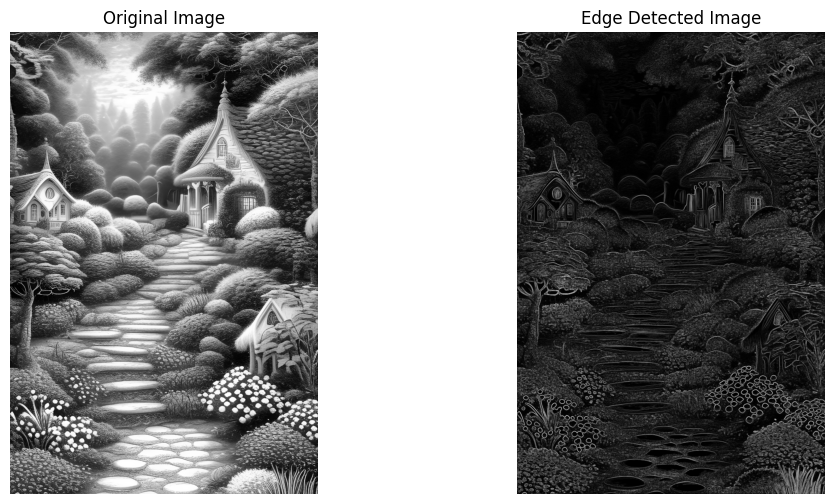

[DEBUG] Display complete.


In [ ]:
from google.colab import files
import cv2
import numpy as np
from matplotlib import pyplot as plt

print("Prompting user to upload a PNG image file...")
uploaded = files.upload()

if not uploaded:
    raise SystemExit(" No file uploaded. Rerun the cell and choose a file.")

filename = next(iter(uploaded.keys()))
print(f"Uploaded file: {filename}")
print(f" File size: {len(uploaded[filename])} bytes")

image = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_GRAYSCALE)
if image is None:
    raise SystemExit("Failed to load the uploaded image.")

print(f" Image successfully loaded.")
print(f" Image shape: {image.shape}, dtype: {image.dtype}")
print(f" Max pixel value: {np.max(image)}, Min pixel value: {np.min(image)}")
print(f"Mean pixel value: {np.mean(image):.2f}, Std dev: {np.std(image):.2f}")

def sobel_filter(image):
    print(" Initializing Sobel kernels...")
    sobel_x_kernel = np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]])

    sobel_y_kernel = np.array([[-1, -2, -1],
                               [0, 0, 0],
                               [1, 2, 1]])

    print("Applying Sobel X filter...")
    sobel_x = cv2.filter2D(image, cv2.CV_64F, sobel_x_kernel)
    print(f" Sobel X stats - min: {np.min(sobel_x)}, max: {np.max(sobel_x)}, mean: {np.mean(sobel_x):.2f}")

    print("Applying Sobel Y filter...")
    sobel_y = cv2.filter2D(image, cv2.CV_64F, sobel_y_kernel)
    print(f" Sobel Y stats - min: {np.min(sobel_y)}, max: {np.max(sobel_y)}, mean: {np.mean(sobel_y):.2f}")

    print("Calculating gradient magnitude...")
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    print(f" Gradient magnitude stats - min: {np.min(gradient_magnitude)}, max: {np.max(gradient_magnitude)}")

    print("Normalizing gradient to 0-255...")
    normalized_gradient = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    print(f" Normalized gradient stats - min: {np.min(normalized_gradient)}, max: {np.max(normalized_gradient)}")

    return normalized_gradient

print(" Applying Sobel filter to image...")
output_edge_image = sobel_filter(image)
print(" Sobel filter applied successfully.")

print("Displaying original and edge-detected images...")
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Edge Detected Image")
plt.imshow(output_edge_image, cmap='gray')
plt.axis('off')

plt.show()
print("[DEBUG] Display complete.")
